# Name - Wanshika W.A.R.
## Index - 190663R

### EN2550: Assignment 03 on Object Counting on a Conveyor Belt

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Connected Component Analysis

(01)

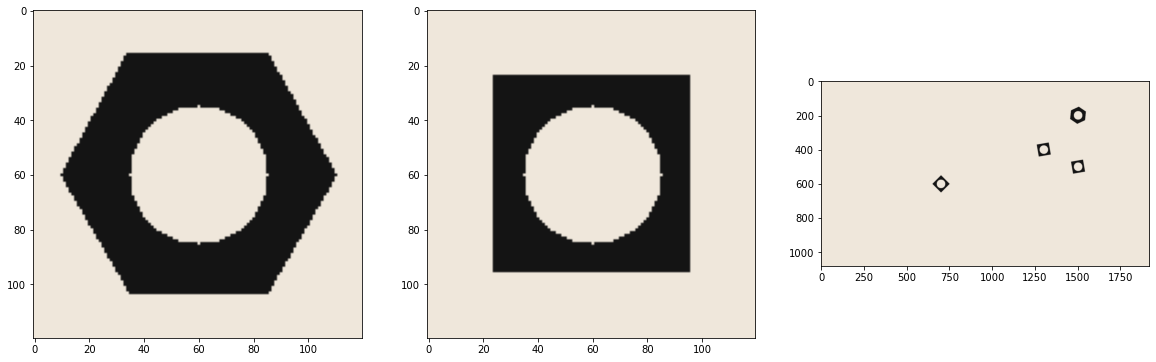

In [2]:
hexnut_template = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assignment 03\hexnut_template.png", cv.IMREAD_COLOR)
squarenut_template = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assignment 03\squarenut_template.png", cv.IMREAD_COLOR)
conveyor_f100 = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assignment 03\conveyor_f100.png", cv.IMREAD_COLOR)


fig, ax = plt. subplots(1,3, figsize = (20, 20))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


(02)

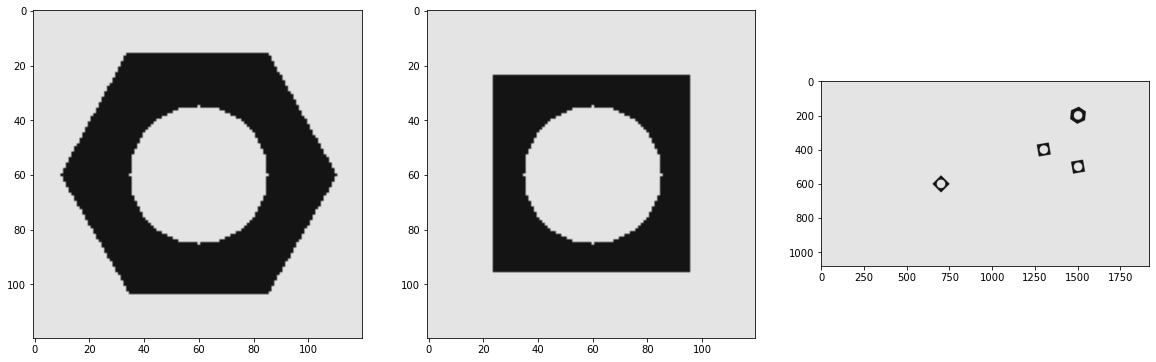

In [3]:
gray_hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_RGB2GRAY)
gray_squarenut_template = cv.cvtColor(squarenut_template,cv.COLOR_RGB2GRAY)
gray_conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

fig, ax = plt. subplots(1,3, figsize = (20, 20))
ax[0].imshow(cv.cvtColor(gray_hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(gray_squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(gray_conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

(03)

Treshold value -  GRAY_HEXNUT_TEMPLATE - 20.0
Treshold value -  GRAY_SQUARENUT_TEMPLATE - 20.0
Treshold value -  GRAY_CONVEYOR_F100 - 20.0


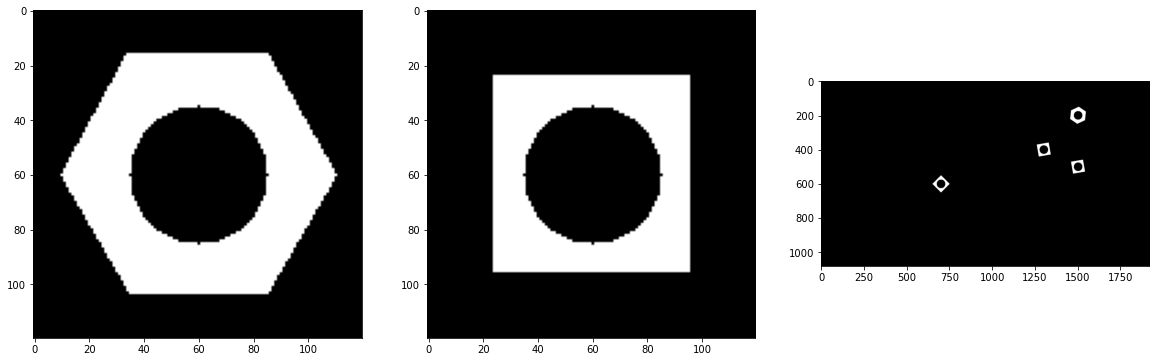

In [4]:
lst = [gray_hexnut_template, gray_squarenut_template, gray_conveyor_f100]
lst_name = ["GRAY_HEXNUT_TEMPLATE", "GRAY_SQUARENUT_TEMPLATE", "GRAY_CONVEYOR_F100"]

otsu_im = []
for k in range(len(lst)):
    th,bw = cv.threshold(lst[k],0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    otsu_im.append(bw)
    print('Treshold value - ',lst_name[k],'- ' "{}".format(th))
    
fig, ax = plt. subplots(1,3, figsize = (20, 20))
ax[0].imshow(cv.cvtColor(otsu_im[0], cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(otsu_im[1], cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(otsu_im[2], cv.COLOR_BGR2RGB))
plt.show()


(03)

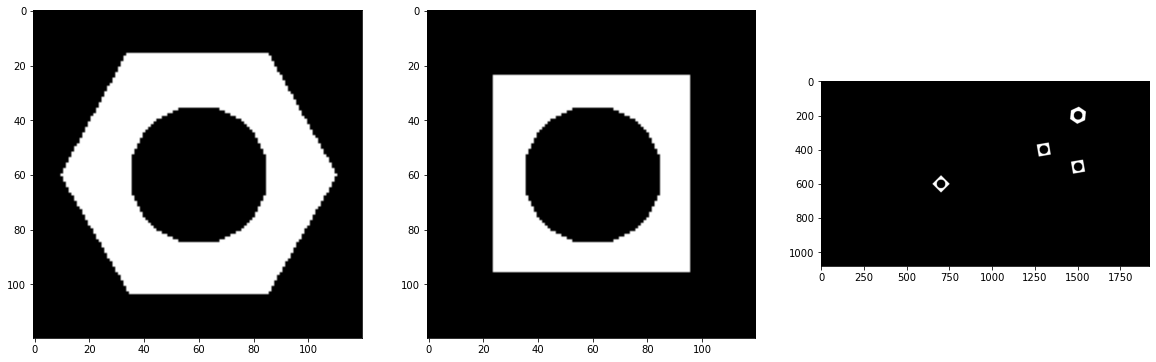

In [5]:
images = []

kernel = np.ones((3,3),np.uint8)
for i in otsu_im:
    closing = cv.morphologyEx(i, cv.MORPH_CLOSE, kernel)
    images.append(closing)
    
fig, ax = plt. subplots(1,3, figsize = (20, 20))
ax[0].imshow(cv.cvtColor(images[0], cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(images[1], cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(images[2], cv.COLOR_RGB2BGR))
plt.show()

(04)


 GRAY_HEXNUT_TEMPLATE 

[INFO] examining component 2/2

[Statistics - Left] 10
[Statistics - Top] 16
[Statistics - Width] 101
[Statistics - Height] 88
[Statistics - Centroid] (59.83375634517766, 59.22356175972927)

Item 1 , area in pixels= 4728
Item 1 , area in mm^2= 185.356512




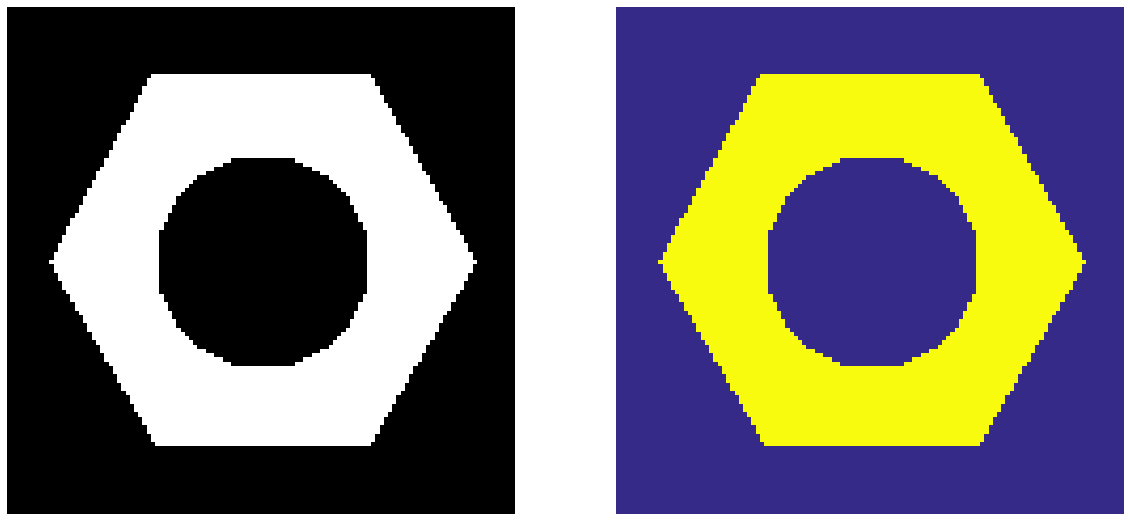


 GRAY_SQUARENUT_TEMPLATE 

[INFO] examining component 2/2

[Statistics - Left] 24
[Statistics - Top] 24
[Statistics - Width] 72
[Statistics - Height] 72
[Statistics - Centroid] (59.196777192438795, 59.196777192438795)

Item 1 , area in pixels= 3227
Item 1 , area in mm^2= 126.51130800000001




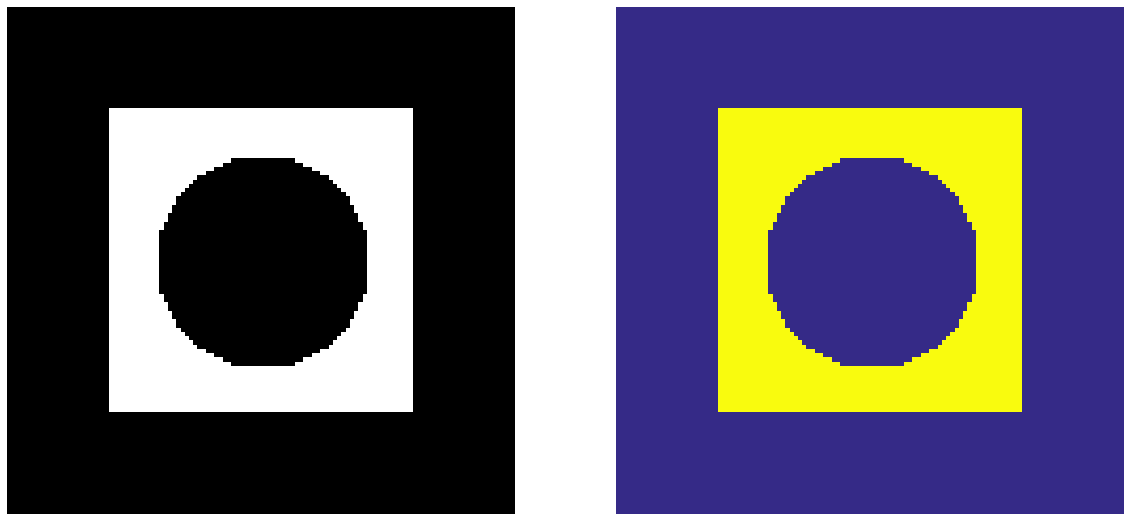


 GRAY_CONVEYOR_F100 

[INFO] examining component 2/5
[INFO] examining component 3/5
[INFO] examining component 4/5
[INFO] examining component 5/5

[Statistics - Left] 650
[Statistics - Top] 550
[Statistics - Width] 101
[Statistics - Height] 101
[Statistics - Centroid] (700.0, 600.0)

Item 1 , area in pixels= 4636
Item 1 , area in mm^2= 181.74974400000002

Item 2 , area in pixels= 3087
Item 2 , area in mm^2= 121.022748

Item 3 , area in pixels= 3087
Item 3 , area in mm^2= 121.022748

Item 4 , area in pixels= 3144
Item 4 , area in mm^2= 123.25737600000001




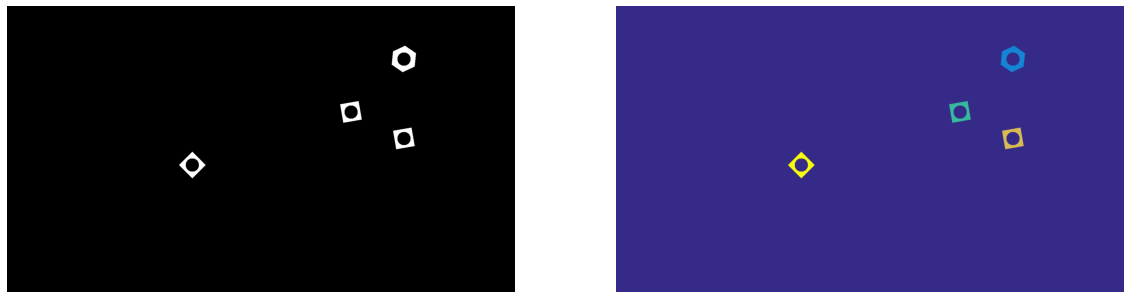

In [6]:
lst_name = ["GRAY_HEXNUT_TEMPLATE", "GRAY_SQUARENUT_TEMPLATE", "GRAY_CONVEYOR_F100"]

for k in range(len(images)):
    print('\n',lst_name[k], '\n')
    im = images[k]
    
    retval,labels,stats,centroides = cv.connectedComponentsWithStats(im, 4, cv.CV_32S)
    
    for i in range(1, retval):
        area = stats[i, cv.CC_STAT_AREA]
        
        if i == 0:
            text = "examining component {}/{} (background)".format(i + 1, retval)
        else:
            text = "examining component {}/{}".format( i + 1, retval,'\n')
        
        print("[INFO] {}".format(text))
        colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"),cv.COLORMAP_PARULA)
    
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        (C1, C2) = centroides[i]
        
    print("\n[Statistics - Left] {}".format(x))
    print("[Statistics - Top] {}".format(y))
    print("[Statistics - Width] {}".format(w))
    print("[Statistics - Height] {}".format(h))
    print("[Statistics - Centroid] {}".format((C1, C2)))
    
    Z=720
    f=8 
    for i,s in enumerate(stats):
            if i!=0:
                print('\nItem',i,', area in pixels=',s[4])
                print('Item',i,', area in mm^2=',s[4]*(2.2e-3)**2*(Z*Z)/(f*f))
                
    print('\n')           
    fig, ax = plt. subplots(1,2, figsize = (20, 20))
    ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[1].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
    ax[1].axis('off')
    plt.show()

(05)

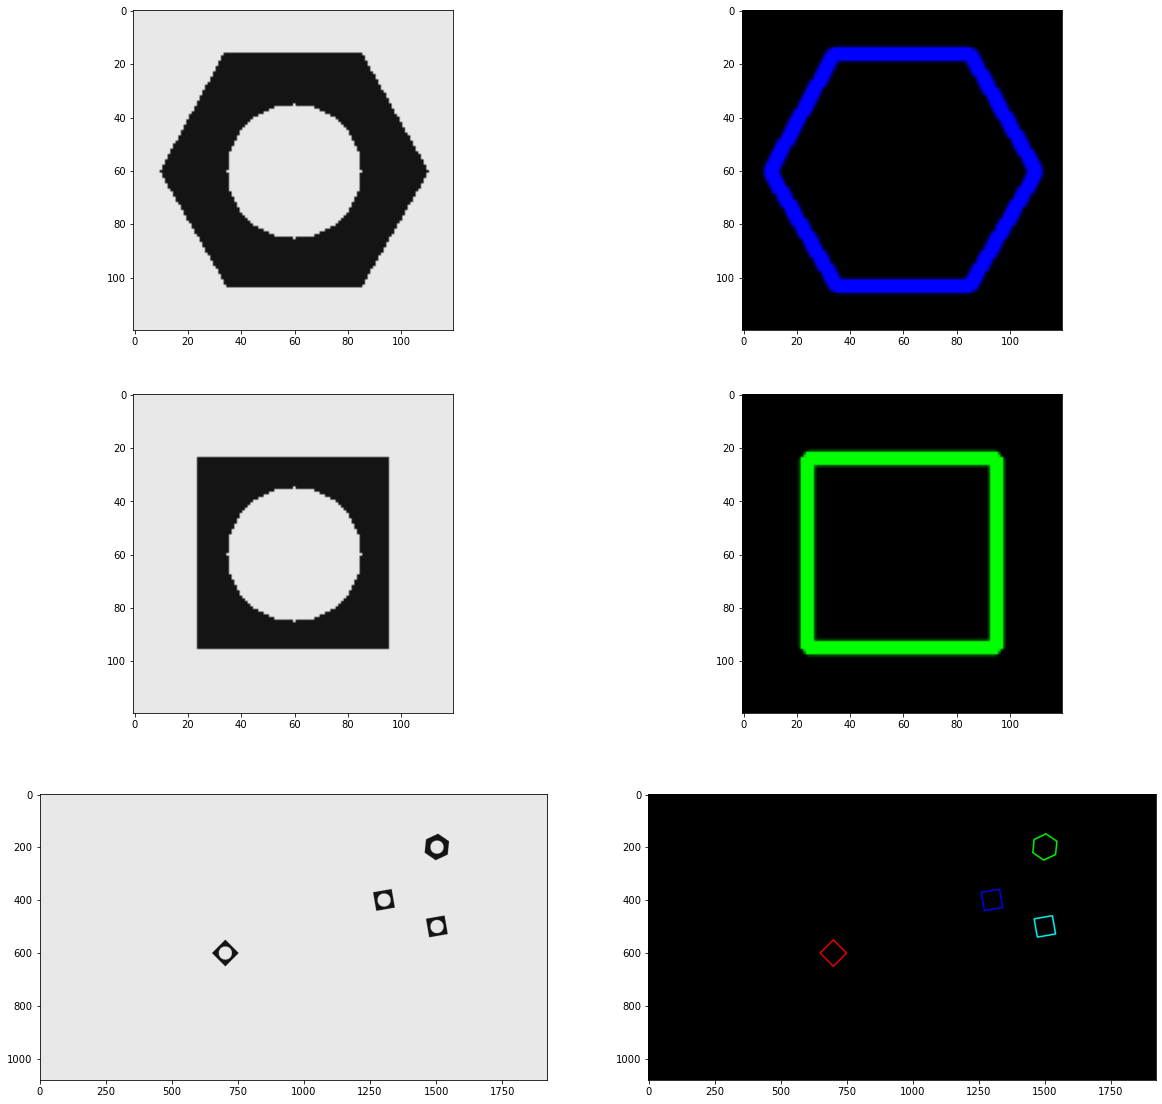

In [7]:
cont = []
colours = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255)]
names = [hexnut_template, squarenut_template, conveyor_f100]
a = 0

fig, ax = plt. subplots(3,2, figsize = (20, 20))

for i in range(len(names)):
    img = names[i]
    g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    contours, hierarchy = cv.findContours(images[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    img_contours = np.zeros(img.shape,np.uint8)
    
    for j in range(len(contours)):
        if (hierarchy[0,j,3] == -1):
            cv.drawContours(img_contours, contours, j, colours[a%4], thickness=3, lineType=cv.LINE_AA)
            a+=1
    
    
    ax[i][0].imshow(cv.cvtColor(g, cv.COLOR_RGB2BGR))
    ax[i][1].imshow(cv.cvtColor(img_contours, cv.COLOR_RGB2BGR))

(06) - Detecting Objects on a Synthetic Conveyor

In [8]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture("E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assignment 03\conveyor.mp4")
f = 0
frame = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):
        break
    
cap.release()
cv.destroyAllWindows()

(07)